In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# load crime and college datasets into Pandas DataFrames
ss1 = "/Users/samrioboli/Documents/ds320crime/data/crime.csv"
crime_df = pd.read_csv(ss1)
ss2 = '/Users/samrioboli/Documents/ds320crime/data/Universities_Colleges.csv'
college_df = pd.read_csv(ss2)

In [ ]:
crime_df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [ ]:
# use geopy library to get latitude and longitude of each address
geolocator = Nominatim(user_agent='crime_prediction',timeout=10)

#crime_df['location'] = crime_df['Location_Block'].apply(geolocator.geocode)
#crime_df['latitude'] = crime_df['location'].apply(lambda x: x.latitude if x else None)
#crime_df['longitude'] = crime_df['location'].apply(lambda x: x.longitude if x else None)

college_df['location'] = college_df['ADDRESS'].apply(geolocator.geocode)
college_df['latitude'] = college_df['location'].apply(lambda x: x.latitude if x else None)
college_df['longitude'] = college_df['location'].apply(lambda x: x.longitude if x else None)


In [ ]:
# remove all na values from the dataset
# acpc == All Crime Philidelphia Cleaned
crime_df = crime_df.dropna()

# changing dtype police district to int
crime_df = crime_df.astype({'Police_Districts': 'int64'})

# order based on date
crime_df['Dispatch_Date_Time'] = pd.to_datetime(crime_df['Dispatch_Date_Time'])
crime_df = crime_df.sort_values(by='Dispatch_Date_Time', ascending=True)

# creating a seperate list for each year, month and day 
crime_df['Year_Nr'] = crime_df['Dispatch_Date_Time'].dt.year
crime_df['Month_Nr'] = crime_df['Dispatch_Date_Time'].dt.month
crime_df['Day_Nr'] = crime_df['Dispatch_Date_Time'].dt.day

# removing the year 2017 since it's not a complete year
crime_df = crime_df[crime_df.Year_Nr != 2017]

# showing the first 5 rows
crime_df.head()

In [ ]:
college_df.head()

,OBJECTID,NAME,ADDRESS,BUILDING_DESCRIPTION,PARCEL_ID,BRT_ID,TENCODE_ID,GROSS_AREA,Shape__Area,Shape__Length,location,latitude,longitude
0,1,Temple University,2450 W HUNTING PARK AVE,OFF/BLD N/COMM W-PKG MASO,155059,883380850,4404002450,231347,231347.864563,2519.967862,"(2450, West Hunting Park Avenue, Tioga, Philad...",40.008701,-75.169231
1,2,Temple University,1501-39 MARKET ST,OFF/BLDG COMM NO GAR MASO,392760,883337500,5356001501,47425,47426.015198,1281.725069,"(Market St, Dharmatala, Kolkata, West Bengal, ...",22.560803,88.353845
2,3,Temple University Medical,801 CHERRY ST,APTS 51-100UNTS MASONRY,13161,771524500,2274000801,29301,29348.386963,707.277624,"(Burnett Plaza, 801, Cherry Street, Downtown F...",32.750452,-97.334558
3,4,Temple University Medical,800-20 RACE ST,SCHOOL 7STY MASONRY,324604,771524000,6712000800,34030,33840.214539,746.550259,"(Race Street, Emsworth, Allegheny County, Penn...",40.509884,-80.091196
4,5,Temple University Medical,191-99 E HUNTINGDON ST,HSE WORSHIP ALL3STY MASON,18474,777204000,4406000191,22500,22697.678589,602.634106,None,NaN,NaN


In [ ]:
college_df = college_df.dropna()

In [ ]:
# merge the two datasets on the nearest latitude and longitude values
merged_df = pd.merge_asof(crime_df.sort_values('Lon'),
                          college_df.sort_values('longitude'),
                          left_on='Lon',
                          right_on='longitude',
                          direction='nearest',
                          tolerance=0.01)

In [ ]:
merged_df2 = pd.merge(crime_df, college_df, left_on=['Lat', 'Lon'], right_on=['latitude', 'longitude'], how='inner')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
merged_df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year_Nr,Month_Nr,Day_Nr,OBJECTID,NAME,ADDRESS,BUILDING_DESCRIPTION,PARCEL_ID,BRT_ID,TENCODE_ID,GROSS_AREA,Shape__Area,Shape__Length,location,latitude,longitude
0,19,1,2015-02-07 12:35:00,2015-02-07,12:35:00,12,201519011845,7900 BLOCK CITY AVE MAIN,500.0,Burglary Non-Residential,15,2015-02,-75.277728,39.976271,2015,2,7,175.0,Temple University,1647 N BROAD ST,APTS DORMITORY MASONRY,385559.0,777504000.0,1.914002e+09,6485.0,6487.067139,346.666953,"(7-Eleven, 1647, North Broad Street, Fortuna, ...",40.256085,-75.268157
1,19,1,2010-08-13 05:09:00,2010-08-13,05:09:00,5,201019074939,7900 BLOCK CITY AVE,600.0,Thefts,15,2010-08,-75.277728,39.976271,2010,8,13,175.0,Temple University,1647 N BROAD ST,APTS DORMITORY MASONRY,385559.0,777504000.0,1.914002e+09,6485.0,6487.067139,346.666953,"(7-Eleven, 1647, North Broad Street, Fortuna, ...",40.256085,-75.268157
2,19,A,2009-07-02 06:25:00,2009-07-02,06:25:00,6,200919059766,7900 BLOCK CITY AVE,1400.0,Vandalism/Criminal Mischief,15,2009-07,-75.277728,39.976271,2009,7,2,175.0,Temple University,1647 N BROAD ST,APTS DORMITORY MASONRY,385559.0,777504000.0,1.914002e+09,6485.0,6487.067139,346.666953,"(7-Eleven, 1647, North Broad Street, Fortuna, ...",40.256085,-75.268157
3,19,1,2013-05-20 10:10:00,2013-05-20,10:10:00,10,201319041523,7900 BLOCK CITY AVE,500.0,Burglary Non-Residential,15,2013-05,-75.277728,39.976271,2013,5,20,175.0,Temple University,1647 N BROAD ST,APTS DORMITORY MASONRY,385559.0,777504000.0,1.914002e+09,6485.0,6487.067139,346.666953,"(7-Eleven, 1647, North Broad Street, Fortuna, ...",40.256085,-75.268157
4,19,1,2013-11-05 14:16:00,2013-11-05,14:16:00,14,201319096577,7900 BLOCK CITY AV,600.0,Thefts,15,2013-11,-75.277728,39.976271,2013,11,5,175.0,Temple University,1647 N BROAD ST,APTS DORMITORY MASONRY,385559.0,777504000.0,1.914002e+09,6485.0,6487.067139,346.666953,"(7-Eleven, 1647, North Broad Street, Fortuna, ...",40.256085,-75.268157


In [ ]:
from folium.plugins import HeatMap
from folium import plugins
from collections import namedtuple
from shapely.geometry import Point

import geopandas # working with geospatial data in python easier
import folium #visualize spatial data in an interactive manner

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library based on matplotlib
import missingno as msn
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total number of crimes commited per year')

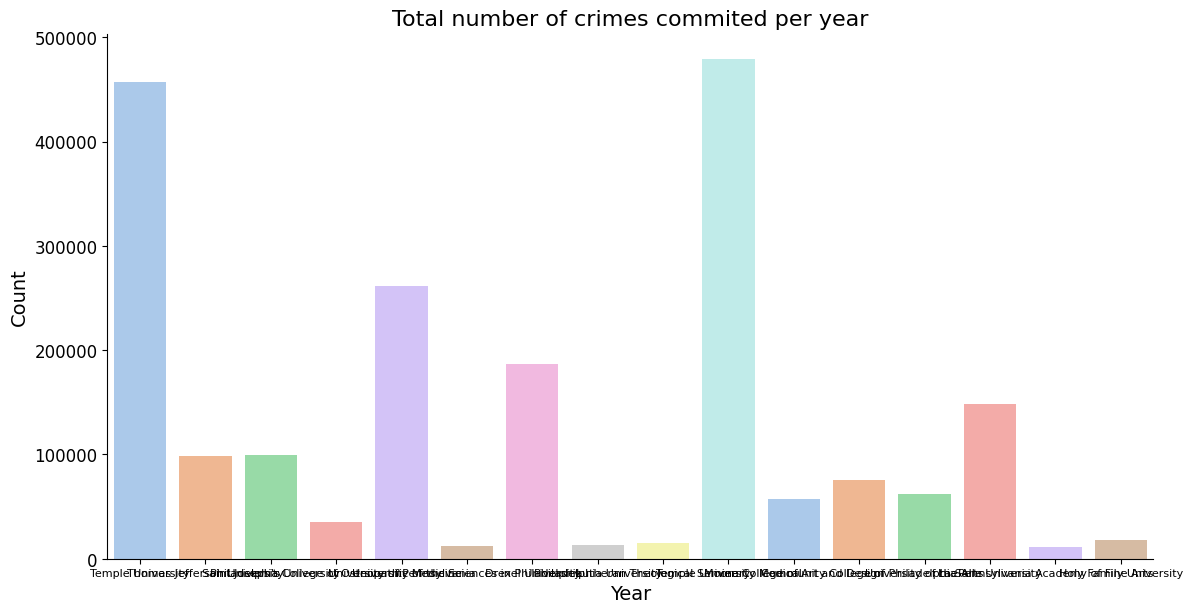

In [ ]:
sns.catplot(x='NAME',
            kind='count',
            palette=("pastel"),
            height=6,
            aspect=2,
            data=merged_df)

plt.xticks(size=8)
plt.yticks(size=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Total number of crimes commited per year", fontsize=16)

In [ ]:
print(merged_df['NAME'].unique())

['Temple University' 'Thomas Jefferson University'
 "Saint Joseph's University"
 'Philadelphia College of Osteopathic Medicine'
 'University of Pennsylvania' 'University of the Sciences in Philadelphia'
 'Drexel University' 'Philadelphia University'
 'Lutheran Theological Seminary' 'Temple University Medical'
 'Moore College of Art and Design' 'Community College of Philadelphia'
 'University of the Arts' 'La Salle University'
 'Pennsylvania Academy of Fine Arts' nan 'Holy Family University']


In [21]:
lon = crime_df['Lon']
lat = crime_df['Lat']
avgLon = sum(lon)/len(lon)
avgLat = sum(lat)/len(lat)

crime_map = folium.Map(location=[avgLat, avgLon], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = crime_df[-25000:]
data_heatmap = data_heatmap[['Lat','Lon']]
data_heatmap = [[row['Lat'],row['Lon']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

campus_location = college_df[['longitude', 'latitude', 'NAME']]
campus = campus_location.groupby(['NAME']).mean().reset_index()

for i in range(len(campus)):
    folium.Marker([campus['latitude'][i], campus['longitude'][i]], popup=campus['NAME'][i]).add_to(crime_map)

crime_map

In [ ]:
# split the merged dataset into training and testing sets
X = merged_df[['latitude', 'longitude']]
y = merged_df['crime_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# train a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# make predictions on the testing set and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [14]:
from opencage.geocoder import OpenCageGeocode

In [16]:
# Set up OpenCage geocoder with your API key
geocoder = OpenCageGeocode(key='f629c7f8947a43469f72b90a8382dd55')

In [20]:
# Define a function to get the latitude and longitude of an address
def geocode_address(address):
    result = geocoder.geocode(address)
    if result:
        return result[0]['geometry']
    else:
        return None

# Apply the geocode_address function to the 'Location_Block' column of the crime dataset
crime_df['location'] = crime_df['Location_Block'].apply(geocode_address)

# Remove rows with missing location data
crime_df = crime_df.dropna(subset=['location'])

# Apply the geocode_address function to the 'Address' column of the college dataset
college_df['location'] = college_df['ADDRESS'].apply(geocode_address)

RateLimitExceededError: Your rate limit has expired. It will reset to 2500 on 2023-04-01T00:00:00

In [ ]:
# Remove rows with missing location data
college_df = college_df.dropna(subset=['location'])
# Define a function to calculate the distance between two points
def distance(point1, point2):
    lat1, lon1 = point1['lat'], point1['lng']
    lat2, lon2 = point2['lat'], point2['lng']
    dlat = abs(lat2 - lat1)
    dlon = abs(lon2 - lon1)
    a = (dlat/2)**2 + (dlon/2)**2 * math.cos(lat1) * math.cos(lat2)
    return 2 * 6371 * math.atan2(math.sqrt(a), math.sqrt(1-a))

# For each crime, find the distance to the nearest college and add it as a new column
crime_df['distance_to_nearest_college'] = crime_df['location'].apply(
    lambda x: min([distance(x, y) for y in college_df['location']]))

# Define the feature and target variables
X = crime_df[['distance_to_nearest_college']]
y = crime_df['Category']